# Exercise 2: More xarray

## Aim: Use some of xarrays built-in methods to do some basic calculations with the data array.

### Issues Covered: 
- Creating a time-series using `.sel()` and `.isel()`
- Creating and customising plots using the inbuilt xarray `.plot()` function
- Doing arithmetic on data arrays
- Using `.mean()`, `.std()`, `.max()` and `.min()`
- Slicing an array with `.slice()`

## 1. Plotting

1. Import the `'../data/tas_rcp45_2055_mon_avg_change.nc'` dataset and create the temperature data array as in the last lesson.

In [1]:
import xarray as xr
ds = xr.open_dataset('../data/tas_rcp45_2055_mon_avg_change.nc')
temperature = ds["tas"]
temperature

<xarray.DataArray 'tas' (time: 12, lat: 180, lon: 360)> Size: 3MB
[777600 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) object 96B 2065-01-30 12:00:00 ... 2065-12-30 12:00:00
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    comment:           daily-mean near-surface (usually, 2 meter) air tempera...
    original_name:     mo: m01s03i236
    cell_methods:      time: mean
    history:           2010-10-29T11:35:40Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

2. Create a time series from `temperature` by using `sel` to select data for the first latitude and longitude values. There's a few ways to do this - can you think of them? Hint 1: The first latitude value is `-89.5` and the first longitude value is `0`. Hint 2: you can use the syntax `temperature['lat'][0]` to select the first temperature value. Hint 3: you can use `isel` to index a particular dimension. All 3 of these methods will return the same dataset. 

In [2]:
print(temperature['lat'].values)
print(temperature['lon'].values)

# Method 1
# temperature_cell = temperature.sel(lat=-89.5, lon=0.0)
# Method 2
# temperature_cell = temperature.sel(lat=temperature['lat'][0], lon=temperature['lon'][0])
# Method 3
temperature_cell = temperature.isel(lat=0, lon=0)

[-89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 -81.5 -80.5 -79.5 -78.5
 -77.5 -76.5 -75.5 -74.5 -73.5 -72.5 -71.5 -70.5 -69.5 -68.5 -67.5 -66.5
 -65.5 -64.5 -63.5 -62.5 -61.5 -60.5 -59.5 -58.5 -57.5 -56.5 -55.5 -54.5
 -53.5 -52.5 -51.5 -50.5 -49.5 -48.5 -47.5 -46.5 -45.5 -44.5 -43.5 -42.5
 -41.5 -40.5 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 -30.5
 -29.5 -28.5 -27.5 -26.5 -25.5 -24.5 -23.5 -22.5 -21.5 -20.5 -19.5 -18.5
 -17.5 -16.5 -15.5 -14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5  -7.5  -6.5
  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5   4.5   5.5
   6.5   7.5   8.5   9.5  10.5  11.5  12.5  13.5  14.5  15.5  16.5  17.5
  18.5  19.5  20.5  21.5  22.5  23.5  24.5  25.5  26.5  27.5  28.5  29.5
  30.5  31.5  32.5  33.5  34.5  35.5  36.5  37.5  38.5  39.5  40.5  41.5
  42.5  43.5  44.5  45.5  46.5  47.5  48.5  49.5  50.5  51.5  52.5  53.5
  54.5  55.5  56.5  57.5  58.5  59.5  60.5  61.5  62.5  63.5  64.5  65.5
  66.5  67.5  68.5  69.5  70.5  71.5  72.5  73.5  7

3. Create a plot from this time series.

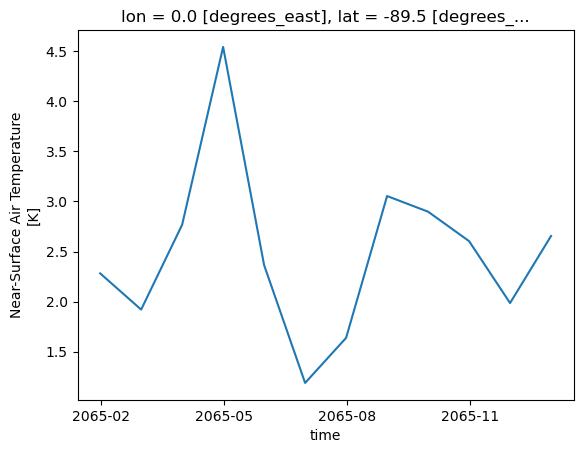

In [3]:
temperature_cell.plot()

4. Make the plot red with 'x' marking the points.

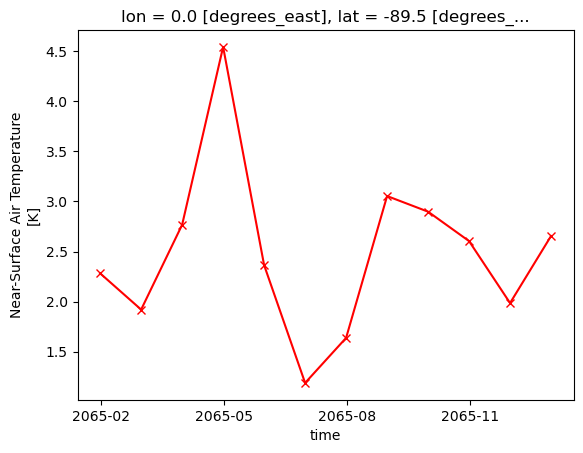

In [4]:
temperature_cell.plot(color='red', marker='x')

5. Create a time series plot comparing the temperature changes at three different grid cells:
 - lat = 0, lon = 0
 - lat = 10, lon = 10
 - lat = 20, lon = 20

Make sure each time series has a different colour and include a legend. Give them different linestyles too.
Hint: use `.isel` to index the lat and lon.
Hint: you will need to import matplotlib to add legend.

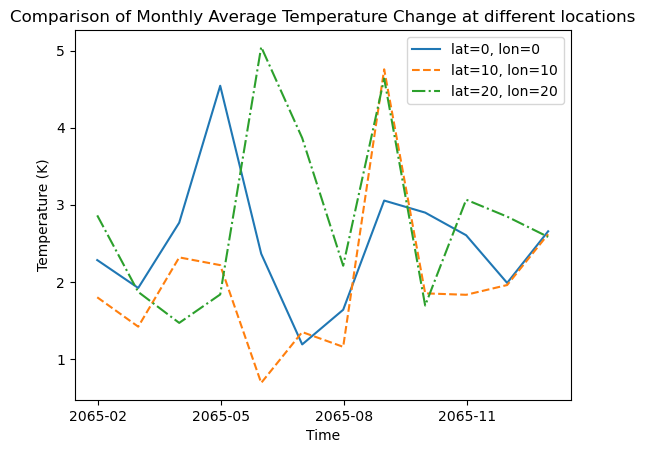

In [5]:
import matplotlib.pyplot as plt

# Extract the time series for each location
temp_1 = temperature.isel(lat=0, lon=0)
temp_2 = temperature.isel(lat=10, lon=10)
temp_3 = temperature.isel(lat=20, lon=20)

# Plot the time series for each location
plt.plot(temp_1['time'], temp_1, label='lat=0, lon=0')
plt.plot(temp_2['time'], temp_2, label='lat=10, lon=10', linestyle='--')
plt.plot(temp_3['time'], temp_3, label='lat=20, lon=20', linestyle='-.')

plt.title('Comparison of Monthly Average Temperature Change at different locations')
plt.ylabel('Temperature (K)')
plt.xlabel('Time')
plt.legend()
plt.show()

6. Let's plot some data in 2D. Use `sel` to select data for January 2065. Hint: the date is in the format YYYY-MM. Label the axes and give the plot a title.

[cftime.Datetime360Day(2065, 1, 30, 12, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2065, 2, 30, 12, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2065, 3, 30, 12, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2065, 4, 30, 12, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2065, 5, 30, 12, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2065, 6, 30, 12, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2065, 7, 30, 12, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2065, 8, 30, 12, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2065, 9, 30, 12, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2065, 10, 30, 12, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2065, 11, 30, 12, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2065, 12, 30, 12, 0, 0, 0, has_year_zero=True)]


Text(0, 0.5, 'Latitude')

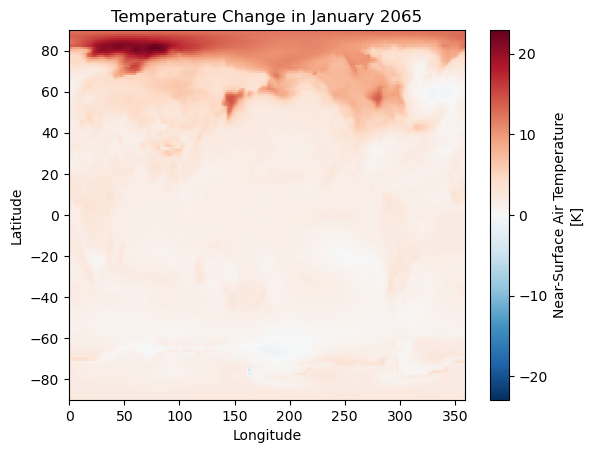

In [6]:
print(temperature['time'].values)
specific_time = temperature.sel(time='2065-01')
specific_time.plot()
plt.title('Temperature Change in January 2065')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## 2. Arithmetic and Aggregation

7. Let's compare the data on one date to the next date. Create two temperature datasets and extract the temperature change data for June 2065 and July 2065.

In [7]:
nearest_time = temperature.isel(time=0)
print(nearest_time)
nearest_time.shape

<xarray.DataArray 'tas' (lat: 180, lon: 360)> Size: 259kB
[64800 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    time     object 8B 2065-01-30 12:00:00
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    comment:           daily-mean near-surface (usually, 2 meter) air tempera...
    original_name:     mo: m01s03i236
    cell_methods:      time: mean
    history:           2010-10-29T11:35:40Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...


(180, 360)

In [8]:
# smthn here
temp_jan = temperature.sel({'time':'2065-01-30'})
temp_jul = temperature.sel({'time': '2065-12-30'})
temp_jan = temp_jan.squeeze()
temp_jul = temp_jul.squeeze()
print(temp_jan.shape)
print(temp_jul.shape)

(180, 360)
(180, 360)


8. Calculate the difference in temperature between july and january

In [9]:
delta_temp = temp_jan - temp_jul
delta_temp

<xarray.DataArray 'tas' (lat: 180, lon: 360)> Size: 259kB
array([[-0.3733337 , -0.375072  , -0.3768103 , ..., -0.37001228,
        -0.3712232 , -0.37228894],
       [-0.37120962, -0.3761642 , -0.38115478, ..., -0.36020494,
        -0.36406255, -0.36765504],
       [-0.5369568 , -0.5443461 , -0.5519166 , ..., -0.5151489 ,
        -0.5223267 , -0.52963257],
       ...,
       [-1.183609  , -1.1955719 , -1.2064323 , ..., -1.1586428 ,
        -1.1659422 , -1.174674  ],
       [-1.9213533 , -1.9294748 , -1.9375181 , ..., -1.8995295 ,
        -1.9055338 , -1.9133158 ],
       [-2.678955  , -2.681819  , -2.6847553 , ..., -2.6705399 ,
        -2.6728115 , -2.6758308 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5

9. Plot the difference in these temperatures using xarrays built-in features. Add a title to the plot.

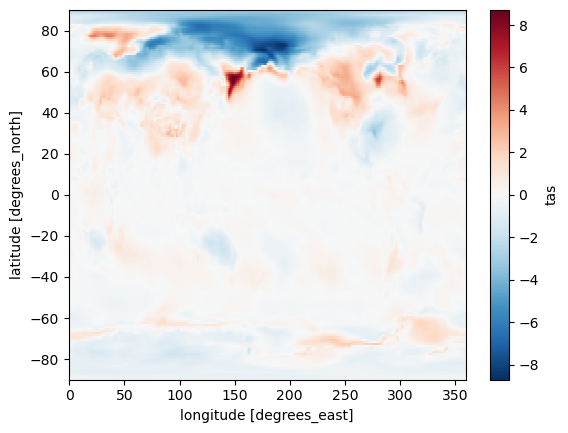

In [10]:
delta_temp.plot()

10. Let's compute and visualize the *average* temperature change for the summer. Slice out the temperature for the summer months (june, july, august). Apply the mean aggregation method and plot the result.

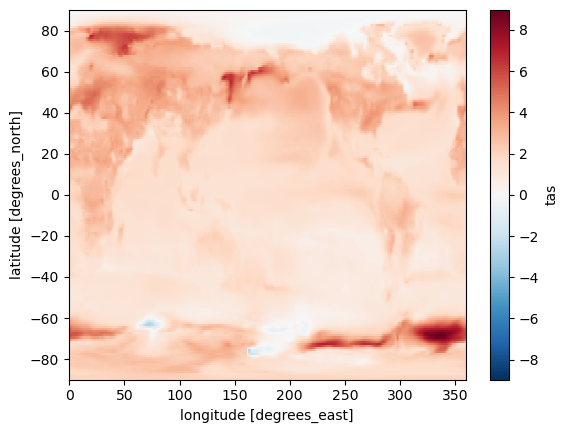

In [11]:
summer = temperature.sel(time=slice('2065-06-30', '2065-08-30'))
summer.mean(dim='time').plot()

11. Using a similar method, calculate the **maximum** average change in temperature over the summer months.

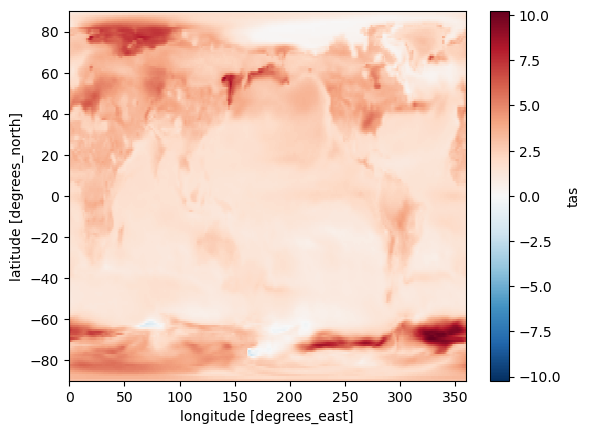

In [12]:
summer.max(dim='time').plot()

12. Harder question: Calculate the standard deviation in air temperature change over the summer months and plot as a 1D time-series.

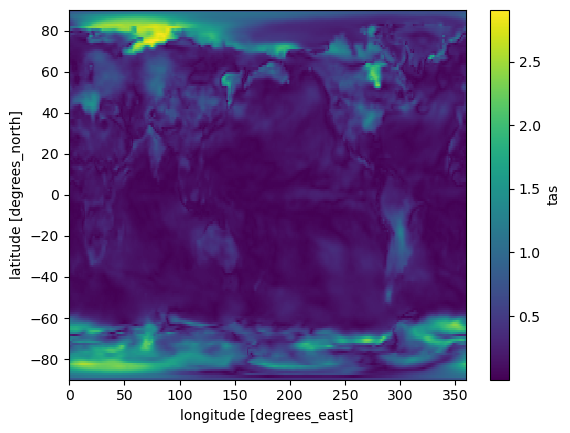

In [13]:
summer.std(dim='time').plot()

## 3. Extension Questions ##

13. Write code to compute the global average temperature change (averaged over all latitudes and longitudes) for the entire time period in the dataset. Then display the result as a 2D time series.

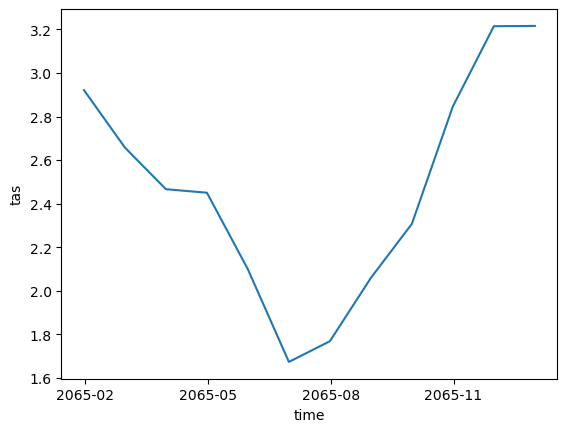

In [14]:
global_avg_temp = temperature.mean(dim=['lat', 'lon'])
global_avg_temp.plot()

14. Calculate the zonal average temperature change for each latitude over the entire time period. Plot the result as a function of latitude.

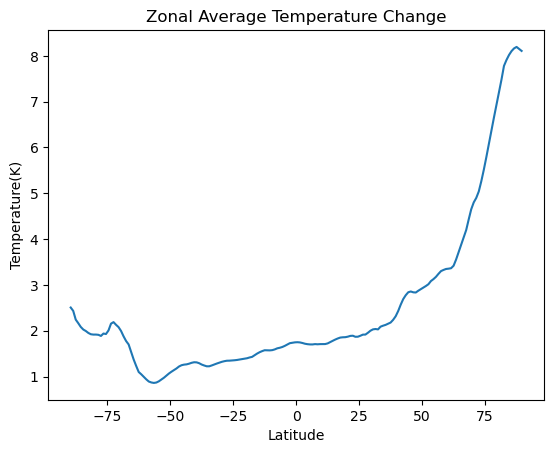

In [15]:
zonal_avg_temp = temperature.mean(dim=['lon', 'time'])
zonal_avg_temp.plot()
plt.title('Zonal Average Temperature Change')
plt.xlabel('Latitude')
plt.ylabel('Temperature(K)')
plt.show()

15. Compute the global standard deviation of temperature change (Across latitudes and longitudes) for the entire time period. Display the result. Hint: use `.std` for standard deviation.

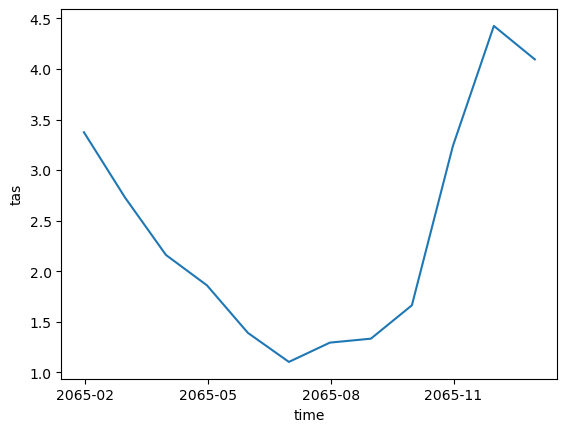

In [16]:
global_std_temp = temperature.std(dim=['lat','lon'])
global_std_temp.plot()

11. Calculate the annual mean temperature change over the entire year and plot it as a heat map

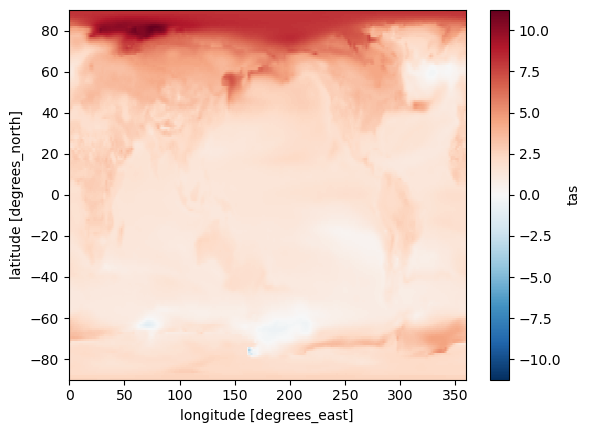

In [17]:
annual_mean = temperature.mean(dim='time')
annual_mean.plot()